In [1]:
# Import libraries
import pandas as pd

In [2]:
# Import data
tweet_train = pd.read_csv('train.csv')
tweet_test = pd.read_csv('test.csv')

In [4]:
tweet_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
tweet_train[tweet_train['keyword'].notnull()].head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [8]:
tweet_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
tweet_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
tweet_train['length'] = tweet_train['text'].apply(len)

In [12]:
tweet_train.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


## Visualization


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [16]:
%matplotlib inline

In [66]:
sns.set_style('darkgrid')
sns.set_palette('bwr_r')

<AxesSubplot:xlabel='target', ylabel='length'>

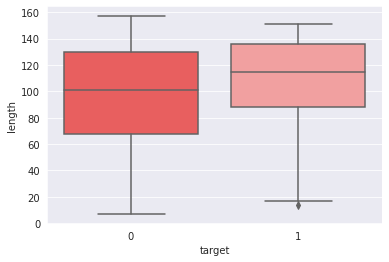

In [62]:
sns.boxplot(data=tweet_train, x = 'target', y = 'length')

<AxesSubplot:xlabel='length', ylabel='Count'>

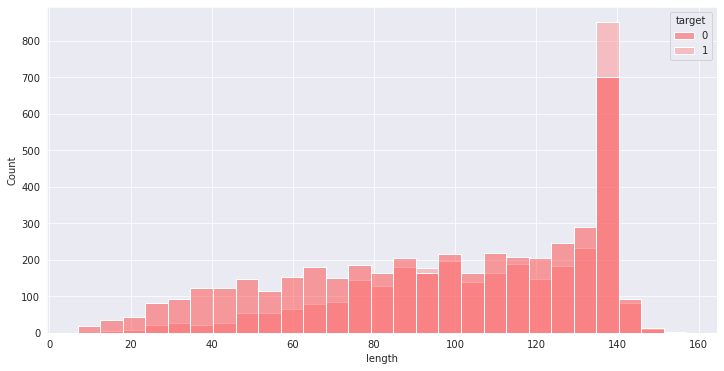

In [72]:
plt.figure(figsize=(12,6))
sns.histplot(data=tweet_train, x='length', hue='target')

## Text Preprocessing

In [106]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [127]:
ps = PorterStemmer()
def text_preprocess(new_tweet):
    # Clear punctuation characters
    nopunc = ''.join([word.lower() for word in new_tweet if word.lower() not in string.punctuation])
    
    # Remove any stopwords
    noStopword = [word for word in nopunc.split() if word not in stopwords.words('english')]
    
    # Stemming words
    root_words = [ps.stem(word) for word in noStopword]
    
    return ' '.join(root_words)

In [136]:
print('Wait for text cleaning\n..\n...\n....\n')
tweet_train['clean text'] = tweet_train['text'].apply(text_preprocess)
print('Text cleaning done!')

Wait for text cleaning
..
...
....

Text cleaning done!


In [137]:
tweet_train.head()

,id,keyword,location,text,target,length,clean,clean text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquak may allah forgiv us,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la rong sask canada,forest fire near la rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,resid ask shelter place notifi offic evacu she...,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,13000 peopl receiv wildfir evacu order california,13000 peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo rubi alaska smoke wildfir pour ...,got sent photo rubi alaska smoke wildfir pour ...


#### Create Bag Of Words

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

In [147]:
bow = CountVectorizer().fit_transform(tweet_train['clean text'])

In [146]:
bow

<7613x19327 sparse matrix of type '<class 'numpy.int64'>'
	with 73580 stored elements in Compressed Sparse Row format>

## Train models

In [152]:
from sklearn.model_selection import train_test_split

In [170]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [160]:
X = bow
y = tweet_train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

In [171]:
models = [
    ('Naive Bayes', MultinomialNB()),
    ('SVM', SVC()),
    ('XGB', XGBClassifier())
]

In [175]:
for model_set in models:
    print('{} model: \n'.format(model_set[0]))
          
    # Train model
    model = model_set[1].fit(X_train, y_train)
    
    # Prediction
    y_pred = model.predict(X_val)
    predictions = [round(value) for value in y_pred]

    # evaluate predictions
    accuracy = accuracy_score(y_val, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('\n***************************************\n')
    
    

Naive Bayes model: 

Accuracy: 78.28%

***************************************

SVM model: 

Accuracy: 79.20%

***************************************

XGB model: 

[18:00:39] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ehsan/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 77.80%

***************************************

